In [54]:
import numpy as np
import csv

def get_data(month):
    infile = open('UK_monthly_temps.csv','r')
    csvreader = csv.reader(infile, delimiter=',')
    data = []
    for row in csvreader:
        data.append(np.array(row))

    header = data[0]
    
    month_index = np.where(header == month)[0]
    
    data = np.asarray(data[1:])
    
    years = data[:,0].astype(int)
    temp = data[:,month_index].T[0].astype(float)
    
    return years, temp

In [64]:
years, temp = get_data('Jan')
# years, temp

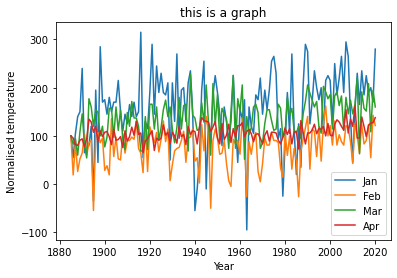

In [74]:
import matplotlib.pyplot as plt

months = ['Jan','Feb','Mar','Apr']

plt.figure()

for month in months:
    years, temp = get_data(month)
    norm_temp = (temp / temp[0]) * 100
    plt.plot(years, norm_temp, label=month)
    
    
plt.legend()
plt.title('this is a graph')
plt.xlabel('Year')
plt.ylabel('Normalised temperature')
plt.show()

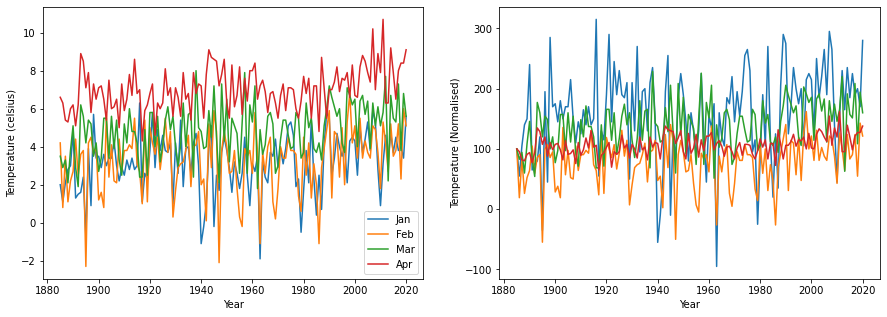

In [76]:
import matplotlib.pyplot as plt

months = ['Jan','Feb','Mar','Apr']

fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(15,5))

for month in months:
    years, temp = get_data(month)
    norm_temp = (temp / temp[0]) * 100
    ax1.plot(years, temp, label=month)
    ax2.plot(years, norm_temp, label=month)
    
    
ax1.legend()

for ax in [ax1,ax2]: ax.set_xlabel('Year')
ax1.set_ylabel('Temperature (celsius)')
ax2.set_ylabel('Temperature (Normalised)')

plt.show()

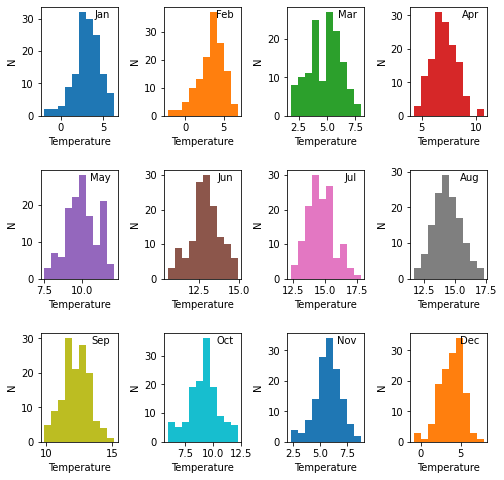

In [118]:
months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

plt.figure(figsize=(8,8))

plt.subplots_adjust(hspace=0.5, wspace=0.6)

for i, month in enumerate(months):
    ax = plt.subplot(3, 4, i+1)
    
    years, temp = get_data(month)
    plt.hist(temp, color='C'+str(i))
    plt.xlabel('Temperature')
    plt.ylabel('N')
    plt.text(0.9, 0.9, month, size=10, transform=ax.transAxes, horizontalalignment='right')
    


In [131]:
dat = []
for month in months:
    years, temp = get_data(month)
    dat.append(temp)
    
dat = np.asarray(dat)

In [133]:
dat.shape

(12, 136)

Text(0, 0.5, 'Temperature')

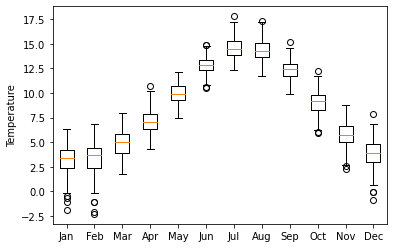

In [134]:
plt.figure()
plt.boxplot(dat.T, labels=months);
plt.ylabel('Temperature')

[Text(0, 0, 'Barclays'),
 Text(1, 0, 'BP'),
 Text(2, 0, 'Tesco'),
 Text(3, 0, 'Vodafone')]

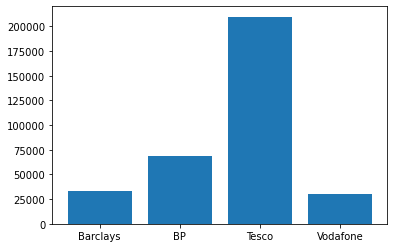

In [159]:
from matplotlib import cm

names = ['Barclays','BP','Tesco','Vodafone']
cap = np.array([33367,68785,209790,29741])

colors = cm.Pastel2(np.arange(len(names)))

fig, ax = plt.subplots(1, 1)
# plt.pie(cap, labels=names, colors=colors);
ax.bar(np.arange(len(names)), cap)

ax.set_xticks(np.arange(len(names)))
ax.set_xticklabels(names)